In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(7000, 3) (3000, 3)
(7000,) (3000,)


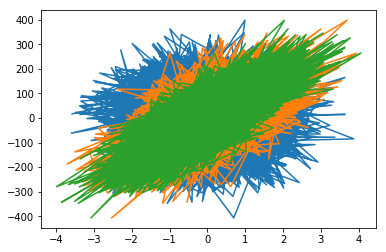

[  0.          63.20420486  80.2483914 ]


In [34]:
X, y, coef = make_regression(n_samples=10000, n_features=3, n_informative=2, n_targets=1, bias=1, noise=0.5, coef=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

plt.plot(X ,y)
plt.show()

In [48]:
g = tf.Graph()
LEARNING_RATE = 0.1
NUM_STEPS = 100

with g.as_default():
    #build compute graph
    with tf.name_scope('inference') as scope:
        x = tf.placeholder(tf.float32, shape=[None, 3])
        y_true = tf.placeholder(tf.float32, shape=None)
        w = tf.Variable(np.random.randn(1, 3), dtype=tf.float32, name='weights')
        b = tf.Variable(np.random.randn(1), dtype=tf.float32, name='bias')
        y_pred = tf.matmul(w, tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        mse_loss = tf.reduce_mean(tf.square(y_pred - y_true))
        
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(mse_loss)

        
    #initialize viriables
    init = tf.global_variables_initializer()
    
    #session
    with tf.Session() as sess:
        sess.run(init)
        
        for step in range(NUM_STEPS):
            sess.run(train, {x: X_train, y_true: y_train})
            if (step % 5 == 0):
                print("Step {0}: {1}".format(step, sess.run([w,b])))
                print("Step {0}: {1}".format(step, sess.run(mse_loss, {x: X_test, y_true: y_test})))
   
print(coef)


Step 0: [array([[  0.3146117 ,  12.91529751,  16.7429657 ]], dtype=float32), array([ 0.81863439], dtype=float32)]
Step 0: 6730.40087890625
Step 5: [array([[ -0.30533275,  45.87535477,  59.59326935]], dtype=float32), array([ 1.62093306], dtype=float32)]
Step 5: 745.6312255859375
Step 10: [array([[ -0.22570603,  57.24321747,  73.51800537]], dtype=float32), array([ 1.43246615], dtype=float32)]
Step 10: 83.2257308959961
Step 15: [array([[ -0.11195509,  61.16163254,  78.0513916 ]], dtype=float32), array([ 1.22168672], dtype=float32)]
Step 15: 9.504789352416992
Step 20: [array([[ -4.75875176e-02,   6.25115662e+01,   7.95300217e+01]], dtype=float32), array([ 1.10328543], dtype=float32)]
Step 20: 1.2763326168060303
Step 25: [array([[ -1.81511603e-02,   6.29764252e+01,   8.00131912e+01]], dtype=float32), array([ 1.04811227], dtype=float32)]
Step 25: 0.361623078584671
Step 30: [array([[ -5.94676798e-03,   6.31364403e+01,   8.01713562e+01]], dtype=float32), array([ 1.02458358], dtype=float32)]
St